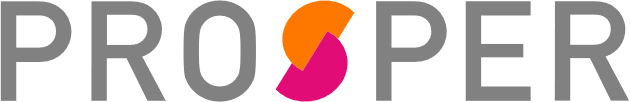


# Return and Risk of Prosper Loans
## by Peter H. Schuld



>### Udacity Data Analyst Nanodegree Program 
>### March 10th, 2020




## Investigation Overview

Prosper Marketplace, Inc. was the first **Peer-to-peer (P2P) lending platform** in the U.S. when it launched in 2006. During the debt bubble of the 2000s, Prosper quickly gained many investors and borrowers.  However, lenders in this market are not professional investors and they have to take big risks because loans in P2P lending are granted without collateral. 

We will be analysing the risk/return characteristics of Prosper loans originated between 2006 and early 2014. Loans from lower quality borrowers come with double-digit interest rates, suggesting attractive returns. However, frequent defaults and charged-offs with notoriously low recovery values bite into the investment performance of Prosper loan portfolios. Therefore, reducing the likelihood of credit events in the portfolio and allocating to loans with attractive risk/return profiles are important skills for successful loan investors. We will be looking at some of the common misconceptions of investors and we will highlight important criteria to evaluate the creditworthiness of potential borrowers.    

## Dataset Overview

Prosper has provided an increasing amount of information about prospective borrowers over time, while also making various changes to its credit policy. Prior to its 2009 US Securities and Exchange Commission (SEC) registration, the company provided **Credit Grades** and other credit information about its prospective lenders. Following the SEC registration, the company created a new model that determined **Prosper Ratings** instead. Additionally, new prospective borrowers were required to have a FICO 8 credit score of at least 640, while returning borrowers only need a score of 600 to request a loan. 

The dataset contains 113,937 observations of Prosper consumer loans with 81 variables each (e.g. ProsperRating). We have deleted 871 observations with duplicate entries and we have removed 131 observations without a rating in either CreditGrade and ProsperRating. Furthermore, we removed 25 observations without a value for the variable **Borrower Annual Percentage Rate – APR**. For each of the remaining 112,910 observations we calculate the variables **Profit & Loss (P&L)** and a **Total Return (TOT)** based on its cash flows.  

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
loan_master = pd.read_csv('loan_master_TOT.csv')
loan_ids = loan_master.ListingKey
len(loan_ids)
print(loan_master.shape)

CreditQuality_df = pd.read_csv('creditquality_annual.csv', index_col='Unnamed: 0')
CreditQuality_df.shape

loan_master['ListingCreationDate']         = pd.to_datetime(loan_master['ListingCreationDate'])
loan_master['ClosedDate']                  = pd.to_datetime(loan_master['ClosedDate'])
loan_master['DateCreditPulled']            = pd.to_datetime(loan_master['DateCreditPulled'])
loan_master['FirstRecordedCreditLine']     = pd.to_datetime(loan_master['FirstRecordedCreditLine'])
loan_master['LoanOriginationDate']         = pd.to_datetime(loan_master['LoanOriginationDate'])

(112910, 86)


> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## Borrowers income range, credit quality and loans' term-to-maturity

The variable **Income Range** shows that most borrowers have an annual income between USD25,000 and USD75,000. The share of high income borrowers USD75,000-99,000 and USD100,000+ is relatively high as well, while the share of borrowers with income below USD25,000 is much smaller. However, there are approx. 7700 loans with income range 'Not displayed'. 

The distribution of **Rating** highlights the different rating methodologies between **ProsperRating** printed in capital letters and the former **CreditGrade** printed here in lower case. The distribution of the ProsperRating has a bell shape centred around Rating class "C", with significantly lower numbers of loans rated high risk-"HR" and top quality-"AA". In contrast, the former CreditGrade is also centred around "c", but with fat-tails on both ends of the credit quality spectrum. The number of top rated Creditgrade-"aa" loans exceeds "a" and "e" and is almost equal to the number of high risk loans with CreditGrade-"hr".  

About 77% of the loans have a **Term** of 3-years and 21.5% have a term of 5-years. Only 1.5% of loans have a 1-year term at origination. 

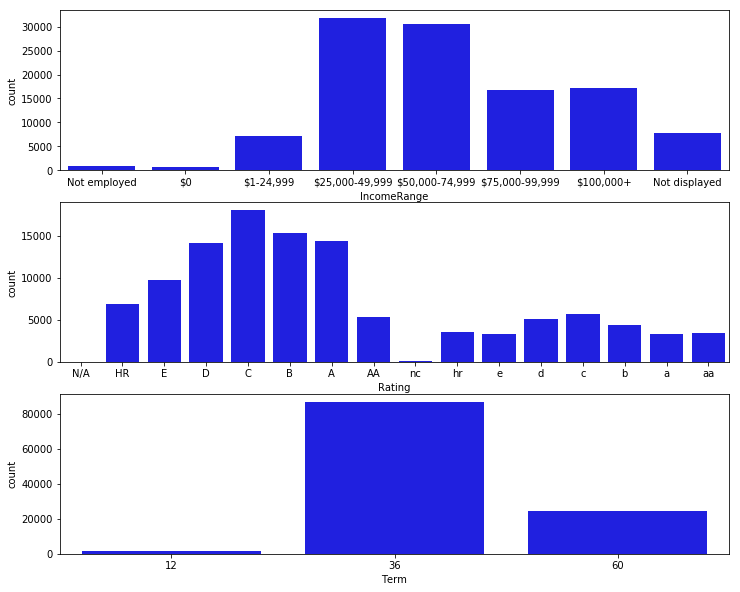

In [3]:
# let's plot all three together to get an idea of each ordinal variable's distribution.

fig, ax = plt.subplots(nrows=3, figsize = [12,10])

default_color = sb.color_palette()[0]
sb.countplot(data = loan_master, x = 'IncomeRange', color = "b", order=['Not employed','$0','$1-24,999','$25,000-49,999','$50,000-74,999','$75,000-99,999','$100,000+', 'Not displayed'], ax = ax[0])
sb.countplot(data = loan_master, x = 'Rating', color = "b", order=['N/A','HR','E','D','C','B','A','AA','nc','hr','e','d','c','b','a','aa'], ax = ax[1])
sb.countplot(data = loan_master, x = 'Term', color='blue', ax = ax[2])



plt.show()

## Borrower Interest Rates

From 2006 to 2009 Prosper operated a variable rate model. Prosper acted as an eBay-style online auction marketplace, with lenders and borrowers ultimately determining loan rates using a **Dutch auction-like system**. This system produced an overlap of borrower rates for different CreditGrades. **Since December 2010, borrower rates are determined by Prosper based on their calculation of estimated return**. There is no public information as to how Prosper calculates borrower interest rate, but we do know they consider credit data such as number of inquiries, available credit, credit card utilization, and recent delinquencies. However, data for the variables **Estimated Return** , **Estimated Effective Yield**  and **Estimated Loss** is available for loans originated since July 2009.

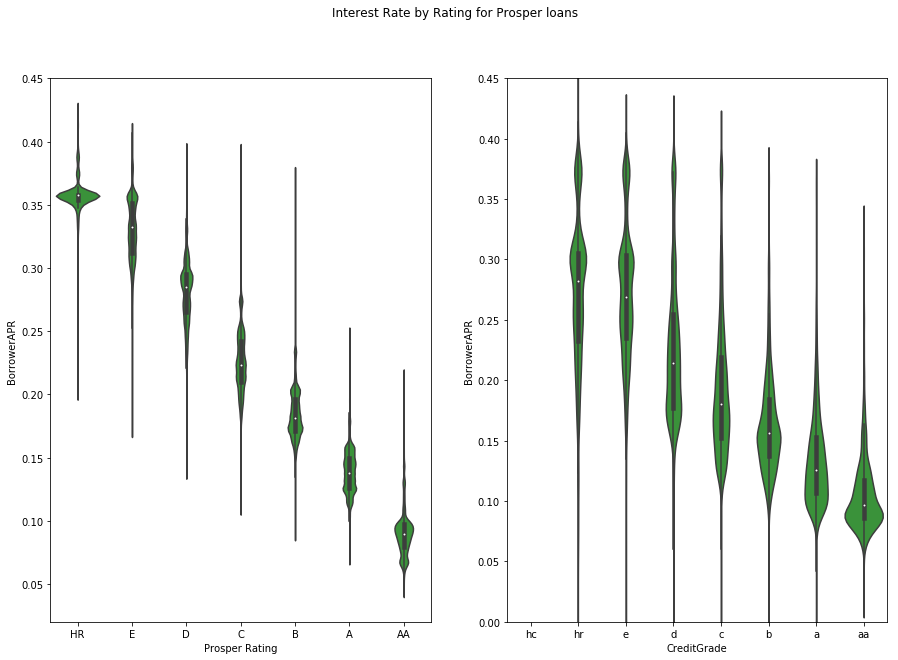

In [4]:
# assist function for plotting 
def rate_by_rating(var, text, color):
    ProsperRating = 'HR','E','D','C','B','A','AA'
    CreditGrade   = 'hc','hr','e','d','c','b','a','aa'
    fig, ax = plt.subplots(ncols = 2, figsize = [15,10])
    sb.violinplot(data = var, y = 'BorrowerAPR', x = 'ProsperRating (Alpha)', ax = ax[0],
                  color = color, order=ProsperRating)
    
    ax[0].set_xlabel("Prosper Rating")
    sb.violinplot(data = var, y = 'BorrowerAPR', x = 'CreditGrade', ax = ax[1],
               color = color, order=CreditGrade)
    ax[1].set_xlabel("CreditGrade")
    fig.suptitle('Interest Rate by Rating for {}'.format(text.capitalize()))
    plt.ylim(0,.45)
    plt.show()
    
rate_by_rating(loan_master, 'Prosper Loans', sb.color_palette()[2])
#loan_master['Rating'].value_counts(normalize=True)    
    

## Estimated Loss

The boxplot chart depicts a dot for every loan issued under Prosper's new borrower rate setting regime. In Dec 2010 the company introduced a new business model with Borrower rates determined solely by Prosper.

For loans issued in Q1 2014, there is an approx. linear relationship between **BorrowerAPR** and **Estimated Loss** visible. For example, BorrowerAPRs of 10%, 20% and 30%  are associated with an estimated loss of approx. 2.5%, 7.5% and 14%, respectively. For 2013, there are 2 trade-off curves with different slopes visible. For 2011 and 2012 there is no clear trade-off curves visible between BorrowerAPR and Estimated Loss.     

In [5]:
# We use values of the variable LoanOriginationQuarter (String-format) for a query on the dataframe loan_master.  


Vintage2006_filter            = loan_master.query("LoanOriginationQuarter == 'Q1 2006' \
                        or LoanOriginationQuarter == 'Q2 2006' or LoanStatus == 'Q3 2006' or LoanStatus == 'Q4 2006'")

Vintage2007_filter            = loan_master.query("LoanOriginationQuarter == 'Q1 2007' \
                        or LoanOriginationQuarter == 'Q2 2007' or LoanStatus == 'Q3 2007' or LoanStatus == 'Q4 2007'")

Vintage2008_filter            = loan_master.query("LoanOriginationQuarter == 'Q1 2008' \
                        or LoanOriginationQuarter == 'Q2 2008' or LoanStatus == 'Q3 2008' or LoanStatus == 'Q4 2008'")

Vintage2009_filter            = loan_master.query("LoanOriginationQuarter == 'Q1 2009' \
                        or LoanOriginationQuarter == 'Q2 2009' or LoanStatus == 'Q3 2009' or LoanStatus == 'Q4 2009'")

Vintage2010_filter            = loan_master.query("LoanOriginationQuarter == 'Q1 2010' \
                        or LoanOriginationQuarter == 'Q2 2010' or LoanStatus == 'Q3 2010' or LoanStatus == 'Q4 2010'")

Vintage2011_filter            = loan_master.query("LoanOriginationQuarter == 'Q1 2011' \
                        or LoanOriginationQuarter == 'Q2 2011' or LoanStatus == 'Q3 2011' or LoanStatus == 'Q4 2011'")

Vintage2012_filter            = loan_master.query("LoanOriginationQuarter == 'Q1 2012' \
                        or LoanOriginationQuarter == 'Q2 2012' or LoanStatus == 'Q3 2012' or LoanStatus == 'Q4 2012'")

Vintage2013_filter            = loan_master.query("LoanOriginationQuarter == 'Q1 2013' \
                        or LoanOriginationQuarter == 'Q2 2013' or LoanStatus == 'Q3 2013' or LoanStatus == 'Q4 2013'")

Vintage2014_filter            = loan_master.query("LoanOriginationQuarter == 'Q1 2014' \
                        or LoanOriginationQuarter == 'Q2 2014' or LoanStatus == 'Q3 2014' or LoanStatus == 'Q4 2014'")




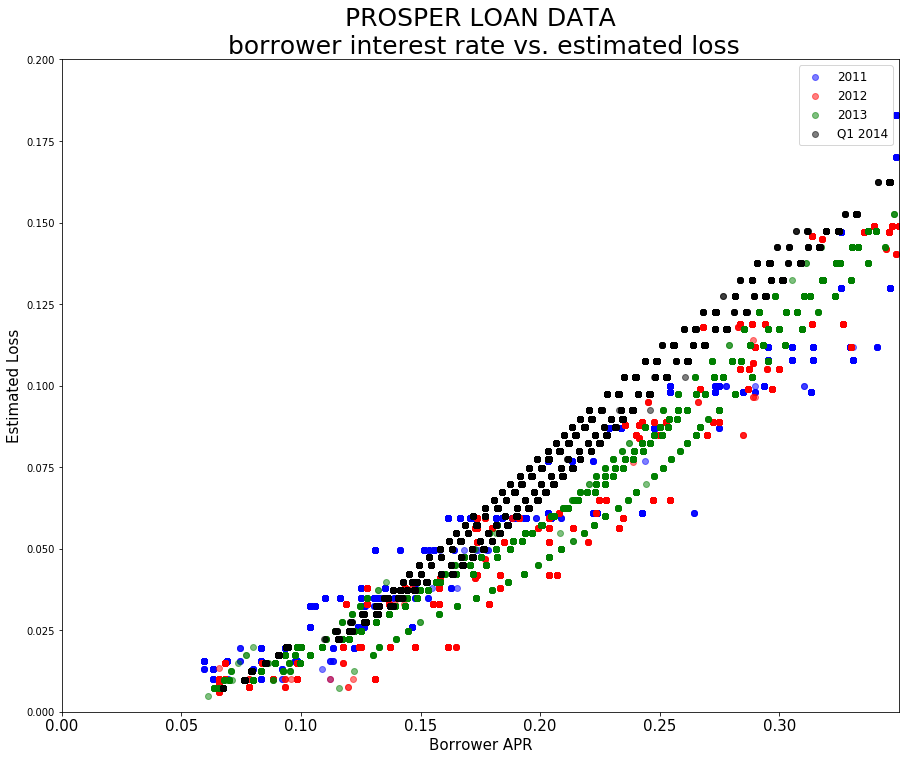

In [6]:
text = ['2011', '2012' , '2013', 'Q1 2014']

plt.figure(figsize = [15, 12])
plt.scatter(data = Vintage2011_filter, y = 'EstimatedLoss', x = 'BorrowerAPR', color='b', alpha = 1/2)
plt.scatter(data = Vintage2012_filter, y = 'EstimatedLoss', x = 'BorrowerAPR', color='r', alpha = 1/2)
plt.scatter(data = Vintage2013_filter, y = 'EstimatedLoss', x = 'BorrowerAPR', color='g', alpha = 1/2)
plt.scatter(data = Vintage2014_filter, y = 'EstimatedLoss', x = 'BorrowerAPR', color='k', alpha = 1/2)
plt.title('PROSPER LOAN DATA\n borrower interest rate vs. estimated loss', fontsize=25)
plt.xticks([0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3], rotation=0, fontsize=15)
plt.xlim([0, 0.35])
plt.ylim([0, 0.2])
plt.xlabel('Borrower APR', rotation=0, fontsize=15)
plt.ylabel('Estimated Loss', rotation=90, fontsize=15)
plt.legend(text, fontsize='large')
plt.show();

## The Development of Loan Status

The chart reveals the dichotomy in the Prosper loan data with different average credit quality before and after the 2008-2009 Financial Crisis. From the start in 2006 Prosper's loan portfolio grew strongly until coming to a complete standstill in late 2008. The filing for Chapter 11 bankruptcy protection by Lehman Brothers on September 15, 2008, brought an end to the period of 'easy credit'. 

Since its SEC registration in 2009, Prosper has provided the proprietary "Prosper Rating" for prospective borrowers based on the company's estimation of that borrower's "estimated loss rate". Correspondingly, the number of defaults is lower in loan vintages post 2009, albeit at lower overall origination activity. However, the number of charged-offs has picked up again in the 2011 and 2012 vintages. Since 2012, Prosper shows a strong growth in new loan origination surpassing pre crisis levels.

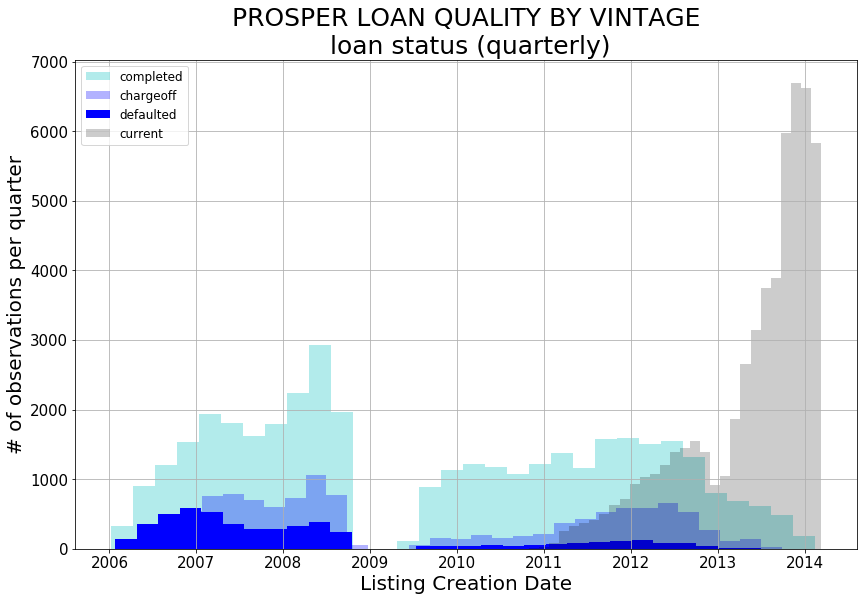

In [7]:
Defaulted_filter              = loan_master[loan_master['LoanStatus']=='Defaulted']
Chargedoff_filter             = loan_master[loan_master['LoanStatus']=='Chargedoff']
Completed_filter              = loan_master[loan_master['LoanStatus']=='Completed']
Current_filter                = loan_master[loan_master['LoanStatus']=='Current']
Matured_filter                = loan_master.query("LoanStatus == 'Completed' or LoanStatus == 'Defaulted' \
                                                              or LoanStatus == 'Chargedoff'")
Cancelled_filter              = loan_master[loan_master['LoanStatus']=='Cancelled'] 
FinalPaymentInProgress_filter = loan_master[loan_master['LoanStatus']=='FinalPaymentInProgress']


# Description: ListingCreationDate = The date the listing was created.
text=['completed','chargeoff','defaulted','current']
plt.figure(figsize=[14, 9])
plt.title('PROSPER LOAN QUALITY BY VINTAGE\n loan status (quarterly)', fontsize=25)
Completed_filter['ListingCreationDate'].hist(bins=32, alpha=0.3, color='c')
Chargedoff_filter['ListingCreationDate'].hist(bins=32, alpha=0.3, color='b')
Defaulted_filter['ListingCreationDate'].hist(bins=32, alpha=1, color='b')
Current_filter['ListingCreationDate'].hist(bins=32, alpha=0.2, color='k')

plt.legend(text, fontsize='large')
plt.xlabel('Listing Creation Date', fontsize=20)
plt.ylabel('# of observations per quarter', fontsize=20)
plt.xticks(rotation=0, fontsize=15)
plt.yticks(rotation=0, fontsize=15)
plt.show();

## Credit Impairments by Vintage year

The Credit Impairment rate declined from 40% in 2006 to approx. 15% in 2009. Impairments climed up again until reaching approx. 19% in 2011. Thereafter, the Credit Impairments rate declined to 13% in 2012 and 1% in 2013. However, we have to keep in mind that a large number of loans were originated since 2012. Typically borrowers do not default in the 1st year and Credit Impairments will likely rise for recent vintages.  

There is no practical difference between charged-offs and defaults for the investor. The Loss-given-default is similar to the Loss-given-chargedoff.

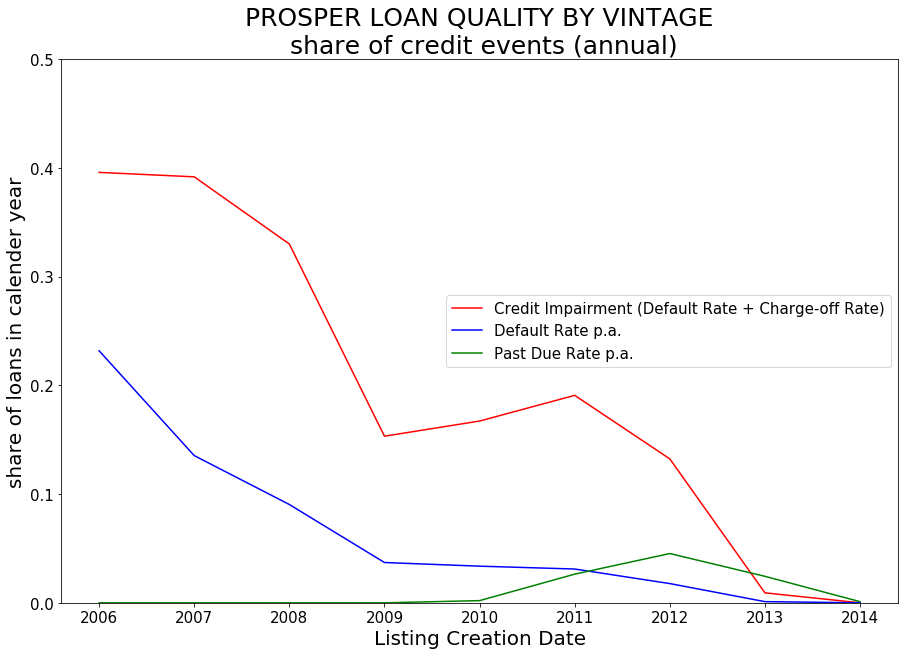

In [8]:
plt.figure(figsize=(15,10))
plt.title('PROSPER LOAN QUALITY BY VINTAGE\n share of credit events (annual)', fontsize=25)
plt.plot(CreditQuality_df['credit_impairment'],label = 'Credit Impairment (Default Rate + Charge-off Rate)', color='r')
plt.plot(CreditQuality_df['default_rate'],label = 'Default Rate p.a.', color='b')
plt.plot(CreditQuality_df['past_due_rate'],label = 'Past Due Rate p.a.', color='g')
plt.legend(loc= 'center right', fontsize=15)
plt.ylabel('share of loans in calender year', fontsize=20)
plt.xlabel('Listing Creation Date', fontsize=20)
plt.ylim(0,.5)
plt.xticks( rotation=0, fontsize=15)
plt.yticks( rotation=0, fontsize=15)
plt.show()

## Credit Impairments by Rating

Credit events are more frequent for lower rated loans. Furthermore, loans rated before 2009 (i.e. CreditGrades 'aa' - 'nc')  have significantly higher credit impairment rates than loans originated after 2009 (i.e. ProsperRatings 'AA' - 'HR'). 

However, credit impairments rise in recessionary periods and ProsperRatings were introduced after the last economic downturn.

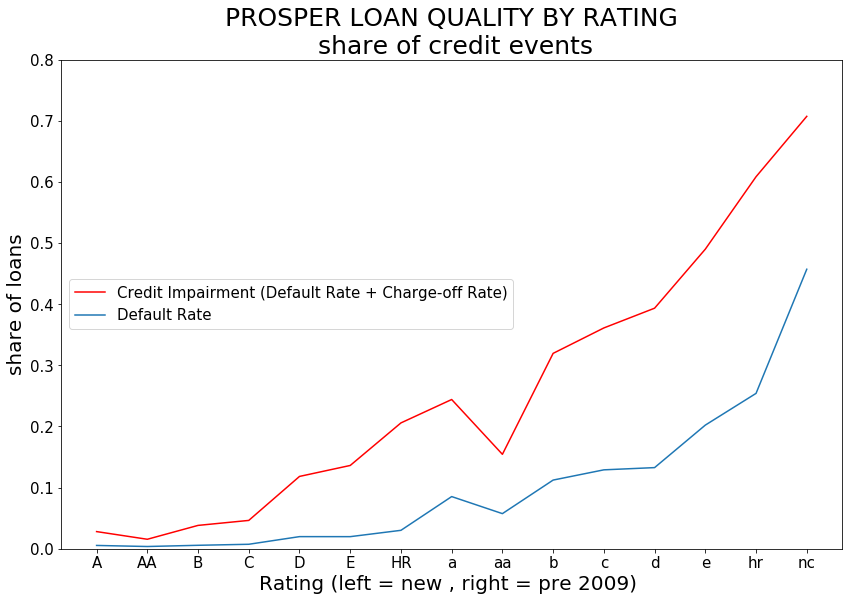

In [9]:
D = (Defaulted_filter['Rating'].value_counts() / loan_master['Rating'].value_counts())
I = ((Defaulted_filter['Rating'].value_counts() + Chargedoff_filter['Rating'].value_counts()  ) / loan_master['Rating'].value_counts())
 
plt.figure(figsize=(14,9))
plt.title('PROSPER LOAN QUALITY BY RATING\n share of credit events', fontsize=25)
plt.plot(I,label = 'Credit Impairment (Default Rate + Charge-off Rate)', color='r')
plt.plot(D,label = 'Default Rate')


plt.legend(loc= 'center left', fontsize=15)
plt.ylabel('share of loans', fontsize=20)
plt.xlabel('Rating (left = new , right = pre 2009) ', fontsize=20)
plt.ylim(0,.8)
plt.xticks( rotation=0, fontsize=15)
plt.yticks( rotation=0, fontsize=15)
plt.show()

## Correlations

There is a high correlation between **BorrowerAPR** and **EstimatedLoss**. Since 2009 the BorrowerAPR is determined by Prosper's calculation of EstimatedLoss. The correlation between BorrowerAPR and **CreditScoreRangeUpper** is -0.43 (i.e not strong). The correlation between BorrowerAPR and **Investors** is -0.31 (i.e fewer number of investors for loans with higher BorrowerAPR). The correlation between total return (**TOT**) and **LP_GrossdPrincipalLoss** is -0.66, indicating that total returns are strongly impacted by losses. 


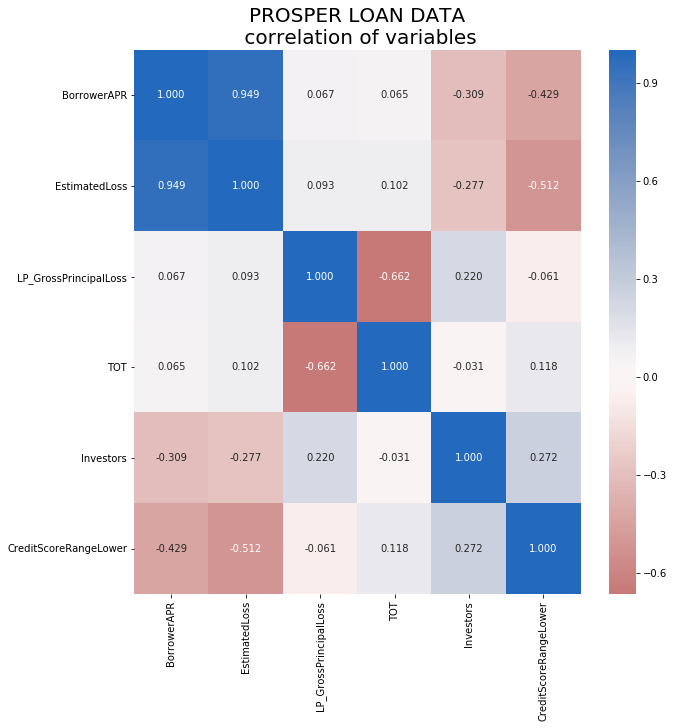

In [10]:
numeric_vars = ['BorrowerAPR', 'EstimatedLoss',\
                'LP_GrossPrincipalLoss' , 'TOT', 'Investors', 'CreditScoreRangeLower']
# correlation plot
plt.figure(figsize = [10, 10])
plt.title('PROSPER LOAN DATA\n correlation of variables', fontsize=20)
sb.heatmap(loan_master[numeric_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.show()

## Factors affecting the borrower rate and loan size

***We use a sample of 5000 loans to produce 4 charts.***

**Upper left**: Apparently, there is a negative relationship between **Rating** and **Borrower APR**. It is clearly visible that loans with higher credit quality tend to have lower BorrowerAPRs. While the Dutch-auction process used for interest rate setting before 2009 still produced some overlap, thereafter the interquartile ranges of different rating classes do not overlap any more. 

**Lower left**: Loans with higher **Ratings** (i.e. better credit quality) have larger average **Loan Original Amounts**. Borrowers with low ratings `HR`: '1’, `E`: '2’, `D`: '3' and `nc`: '8’, `hr`: '9',`e`: '10' are constraint to lower loan volumes. However, since the introduction of the new rating methodology in 2009 average loan volume have increased for all rating classes. 

**Upper right**: Borrowers with **Employment Status** `Not-employed` pay higher average **Borrower APR** on loans. Surprisingly, borrowers with Employment Status `Not available` and `Full-time` both pay the lowest average rates.

**Lower right**: Borrowers with **Employment status** `Full-time`, `Retired` and `Part-time` get the smallest **Loan Original Amounts**, while `Employed` and `Self-Employed` get the largest


Factors affecting the borrower rate and loan size


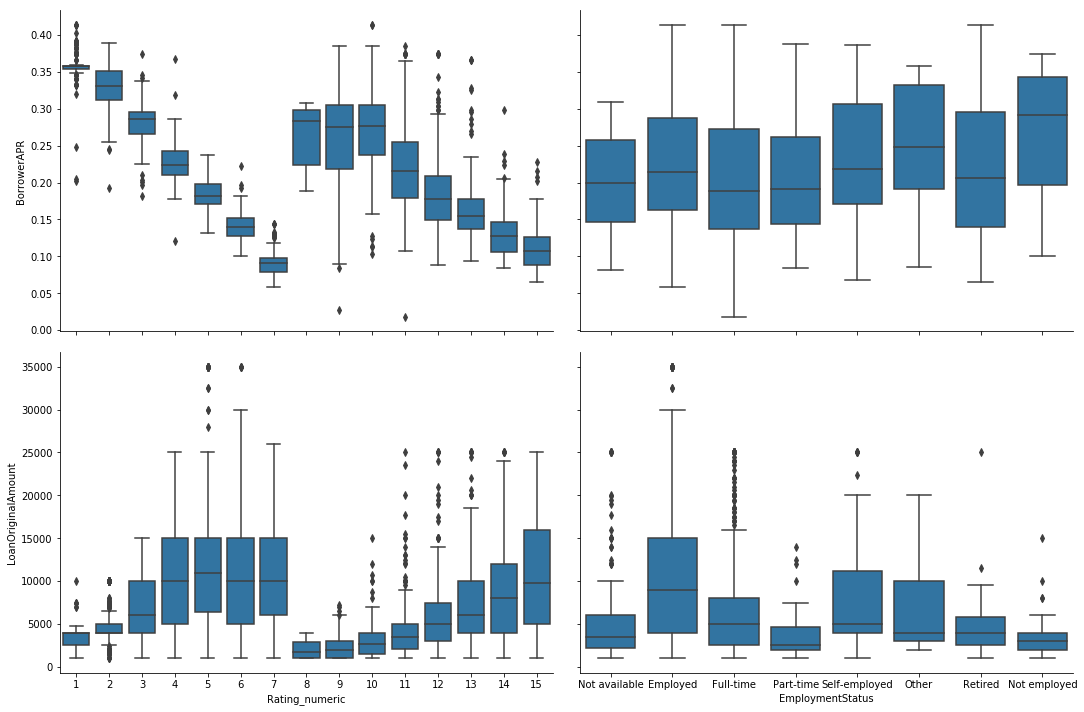

In [11]:
print('Factors affecting the borrower rate and loan size')
categoric_vars = ['Rating_numeric', 'EmploymentStatus']
# plot matrix of numeric features against categorical features.
# can use a large sample since there are few plots and they're simple in nature.

samples = np.random.choice(loan_master.shape[0], 5000, replace = False)
loan_master_samp = loan_master.loc[samples,:]

def boxgrid(x, y, **kwargs):
    """ Quick hack for creating box plots with seaborn's PairGrid. """
    default_color = sb.color_palette()[0];
    sb.boxplot(x, y, color = default_color);

plt.figure(figsize = [22, 22]);

g = sb.PairGrid(data = loan_master_samp, y_vars = ['BorrowerAPR', 'LoanOriginalAmount'], x_vars = categoric_vars,
                size = 5, aspect = 1.5)
g.map(boxgrid)


plt.show()

## Employment status and probability of credit impairments

Loans with **Employment Status** `Employed` have the lowest credit impairment rate below 10%, followed by `Other` at 10% and `Self-employed` below 20%. In contrast, `Not available` has the highest delinquency rate above 40%.

However, `Employed`, `Self-employed`, `Full Time` and `Other` are the only categories still in use by 2014. The category `Not Available` was used for all Prosper loans until 1Q 2007, when it was abundant. The category `Employed`, and `Other` were only introduced in 3Q 2009 and 3Q 2010, respectively. The categories `Part-Time` and `Retired` were used until 2Q 2013 and 4Q 2014, respectively.  
  

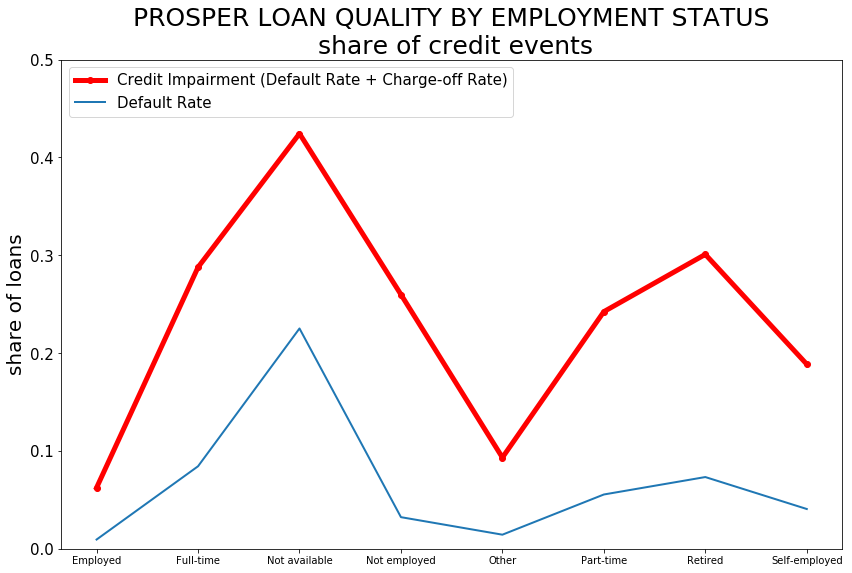

In [12]:
X = (Defaulted_filter['EmploymentStatus'].value_counts() / loan_master['EmploymentStatus'].value_counts() )
Y = ((Chargedoff_filter['EmploymentStatus'].value_counts() + Defaulted_filter['EmploymentStatus'].value_counts()) \
      / loan_master['EmploymentStatus'].value_counts() )


plt.figure(figsize=(14,9))
plt.title('PROSPER LOAN QUALITY BY EMPLOYMENT STATUS\n share of credit events', fontsize=25)
plt.plot(Y, 'ro-', label = 'Credit Impairment (Default Rate + Charge-off Rate)', linewidth=5)
plt.plot(X,label = 'Default Rate', linewidth=2)
plt.legend(loc= 'upper left', fontsize=15)
plt.ylabel('share of loans', fontsize=20)
plt.ylim(0,.5)
plt.yticks( rotation=0, fontsize=15)
plt.show();

## Income and probability of credit events

Investors are right to penalize borrowers with low income, but they **should be more careful providing loans to borrowers with very high income** and to borrowers who do not display income. While the interest rate is determined by the Prosper rating since 2009, investors should limit the volume they provide to those borrowers. Borrowers with high income frequently request large loan amounts, but investors should not perceive them as low risk investments. First, a borrower with a high income might lose his/her job or business and oftentimes they only get new jobs with lower pay. In contrast, many borrowers in the middle-income brackets have stable jobs or can find new once easily with similar pay. Secondly, for business owners in distress recovery values for existing unsecured loans are likely to get reduced further by new "super secured" lenders such as a traditional bank. Lastly, high income borrowers might be less risk averse or more likely to get into costly legal quarrels (e.g. divorce). 

**Investors should be very careful providing any credit to borrowers who do not display their income**. While the category `Not displayed` was only used until 2Q 2007, the categories `$0` and `Not employed` were abandoned in 2014. 


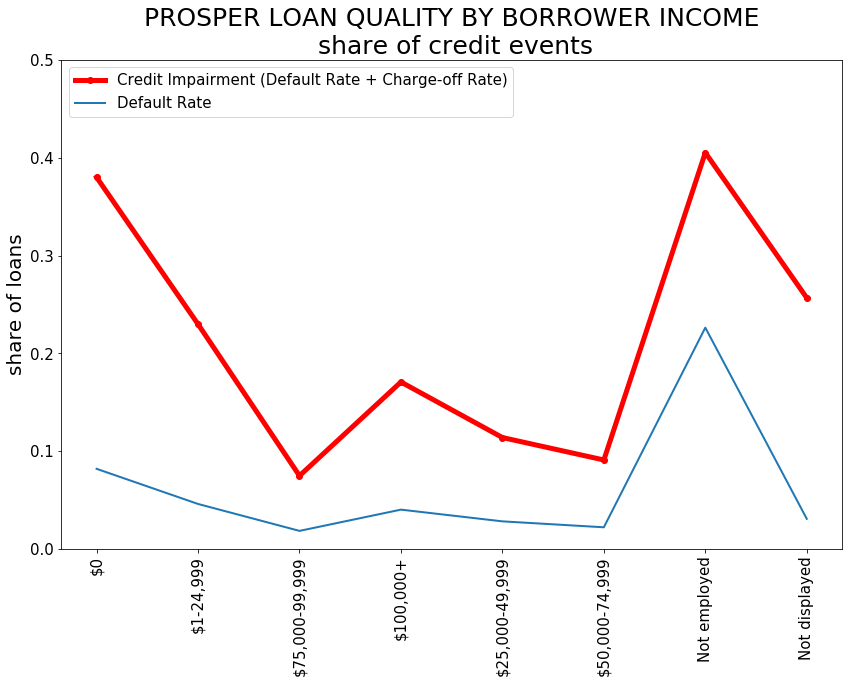

In [13]:
X = (Defaulted_filter['IncomeRange'].value_counts() / loan_master['IncomeRange'].value_counts() )
Y = ((Chargedoff_filter['IncomeRange'].value_counts() + Defaulted_filter['IncomeRange'].value_counts() )\
     / loan_master['IncomeRange'].value_counts() )

plt.figure(figsize=(14,9))
plt.title('PROSPER LOAN QUALITY BY BORROWER INCOME\n share of credit events', fontsize=25)
plt.plot(Y, 'ro-', label = 'Credit Impairment (Default Rate + Charge-off Rate)', linewidth=5)
plt.plot(X,label = 'Default Rate', linewidth=2)
plt.xticks(["$0",'$1-24,999','$25,000-49,999','$50,000-74,999','$75,000-99,999',\
            '$100,000+','Not employed','Not displayed'], rotation=90, fontsize=15)

plt.legend(loc= 'upper left', fontsize=15)
plt.ylabel('share of loans', fontsize=20)
plt.ylim(0,.5)
plt.yticks( rotation=0, fontsize=15)
plt.show();

## Realized Total Returns 

The two barplot charts show the average **Total Return (TOT)** by **Rating** for the new ProsperRating (left) and the old CreditGrade (right). 

$ Total Return  =  \frac{Cash Flows}{Original Loan Amount}$  

***Cash Flow*** from borrowers comprises of ***interest payments*** and the ***amortization of principal***. For defaults and charged-offs we substract the remaining principal from the numerator (i.e. total depreciation ignoring recovery values). 

The total return is negative for all scales of the old **CreditGrade** spectrum except top-rated `aa`. In general, for loans originated before 2009, a lower credit quality is associated with a lower total return. The worst investment performance was generated in the lowest CreditGrades `e` and `hr`. The moderate magnitude of the negative total returns indicate that most loans paid interest and amortized principal for some time before they went into delinquency, providing a cushion.  The volatility is high for all CreditGrades. 

In sharp contrast, new loans originated since 2009 show ascending positive total returns and increasing volatility for lower rating classes. However, **most of the loans with a Prosper Rating are still outstanding and there is a large share of recently issued loans**. 


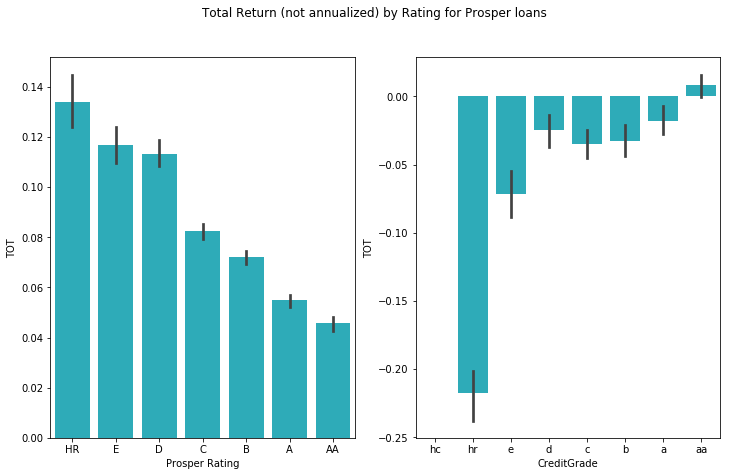

54920   Number of closed loans
112910  Number of total loans
49.0  % of all loans are closed already.
939.5 million USD nominal amount.
8321 USD average loan size.


In [14]:
# assist function for plotting 
def tot_by_rating(var, text, color):
    ProsperRating = 'HR','E','D','C','B','A','AA'
    CreditGrade   = 'hc','hr','e','d','c','b','a','aa'
    fig, ax = plt.subplots(ncols = 2, figsize = [12,7])
    sb.barplot(data = var, y = 'TOT', x = 'ProsperRating (Alpha)', ax = ax[0],
                  color = color, order=ProsperRating)
    ax[0].set_xlabel("Prosper Rating")
    sb.barplot(data = var, y = 'TOT', x = 'CreditGrade', ax = ax[1],
               color = color, order=CreditGrade)
    ax[1].set_xlabel("CreditGrade")
    fig.suptitle('Total Return (not annualized) by Rating for {}'.format(text.capitalize()))
    plt.show()
    

tot_by_rating(loan_master, 'Prosper Loans', sb.color_palette()[9])
print(loan_master.ClosedDate.count(), '  Number of closed loans')
print(loan_master.shape[0],' Number of total loans')
print((round(loan_master.ClosedDate.count() / loan_master.shape[0],2)*100),' % of all loans are closed already.')
print(round(loan_master.LoanOriginalAmount.sum()/1000000,1),'million USD nominal amount.')
print(round(loan_master.LoanOriginalAmount.mean(),),'USD average loan size.')

The bar chart shows the realized **Total Return (TOT)** by **Loan Status** for the entire portfolio of Prosper loans in the data base.  **Current** loans have already received interest payments of 9.8% of the principal amount outstanding. Here we assume that all those loans will be redeemed in full. The historical total return on all **Completed** loans was +18.3% from earned interest. However, the realized TOT on **Defaulted** loans was -59.8% (i.e. Loss-given-default) because most principal was lost. **Chargedoff** loans show a similar performance of -54.9% (Loss-given-chargedoff). 

The **Portfolio** total return is + 4.5% and **Portfolio incl. Recovery** total return is + 5.0%. The meagre average recovery value of unsecured consumer loans does not help much to cushion the negative cash flow impact of defaults and charged offs on the portfolio. However, the magnitude of the portfolio total return is reduced by recent inflows and we should not use it as the sole yardstick for measuring investment performance. The fact that the Prosper loan portfolio shows a positive investment return over an entire credit cycle and that it generates large inflows are both measures of success.  


### RecoveryRatio (average)###

 $$RecoveryRatio=\sum_{i=1}^n \frac{RecoveryValue}{GrossPrincipalLoss} = 0.063%$$ 
 
with n = Number of non-performing loans in the dataframe

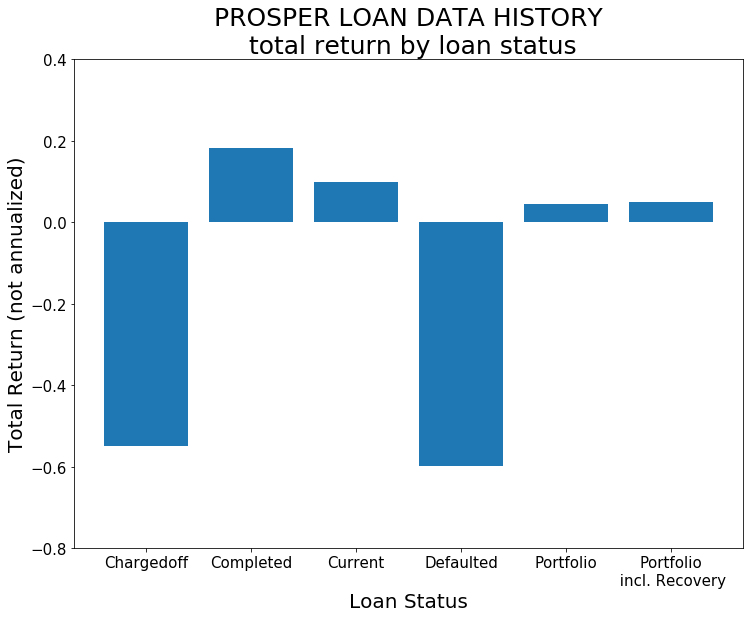

In [15]:
Recovery_value = ( loan_master['LP_GrossPrincipalLoss'].sum() - loan_master['LP_NetPrincipalLoss'].sum() \
           + loan_master['LP_NonPrincipalRecoverypayments'].sum() ) 

Recovery_ratio = Recovery_value / loan_master['LP_GrossPrincipalLoss'].sum()

pL_defaulted        = ((Defaulted_filter['P&L'].sum()   / Defaulted_filter['LoanOriginalAmount'].sum()))
pL_chargedoff       = ((Chargedoff_filter['P&L'].sum() / Chargedoff_filter['LoanOriginalAmount'].sum()))
pL_completed        = ((Completed_filter['P&L'].sum() / Completed_filter['LoanOriginalAmount'].sum()))
pL_current          = ((Current_filter['P&L'].sum() / Current_filter['LoanOriginalAmount'].sum()))
pL_Pf               = ((loan_master['P&L'].sum()   / loan_master['LoanOriginalAmount'].sum()))
pL_Pf_withRecovery  = (((loan_master['P&L'].sum() + Recovery_value )  / loan_master['LoanOriginalAmount'].sum()))


plt.figure(figsize=[12, 9])
plt.title('PROSPER LOAN DATA HISTORY\n total return by loan status', fontsize=25)
data = {'Current'  : pL_current, 'Defaulted': pL_defaulted, 'Chargedoff': pL_chargedoff, \
#        'Recovery': recovery_estimate,\
        'Completed': pL_completed, 'Portfolio': pL_Pf, 'Portfolio\n incl. Recovery': pL_Pf_withRecovery \
         }
names = list(data.keys())
values = list(data.values())
plt.bar(names, values)
plt.xlabel('Loan Status', fontsize=20)
plt.ylabel('Total Return (not annualized)', fontsize=20)
plt.xticks(rotation=0, fontsize=15)
plt.yticks(rotation=0, fontsize=15)
plt.ylim(-0.8,.4)
plt.show();

## The 2010 loan vintage 
Let us start with the 2010 vintage, because it is the first year after the financial crisis. The more sophisticated ProsperRating was already in place by then, but the old Dutch-Auction rate setting mechanism or some variation thereof was still used. The credit impairment rate in 2010 was 16.7% and less than 1% of loan are still outstanding. 

The left chart shows the **ex-post** total return **TOT** by rating class for all Prosper loans originated in 2010. Top`AA`-rated and `A`-rated loans generated a total return of approx. 7% and 6%, respectively. Lower rated loans have higher total returns with `E`-rated loans showing the best performance with approx. 22% total return while high risk `HR`-rated loans generated approx. 20% total return. Loans with `B`,`C` and `D` ratings generated a TOT of approx. 12.5%, 15% and 15%, respectively. The volatility of the total return increases with lower credit quality. However, we must keep in mind that the total return is not annualized, and the loans of 2010 vintage have an average term-to-maturity of 3-years. Therefore, the annualized return is approx. 2.3% for `AA`, 2.0% for `A` , 4.0% for `B` , 4.8% for `C` and `D`, 6.8% for `E` and 6.3% for `HR`. 

$(1 + annual Return)^{NumberOfYears} = (1 + TOT )$

The right chart shows the distribution of Prosper's **ex-ante** Estimated Return by rating class for the 2010 vintage. 


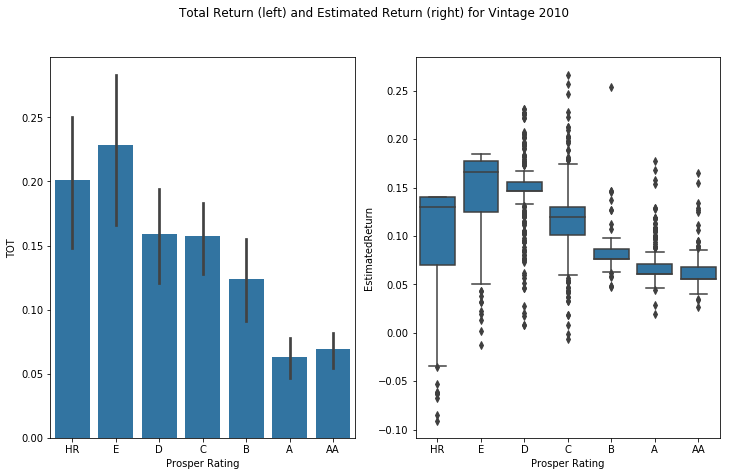

2743 number of closed loans
2744 number of total loans
100.0 % of loans are closed already.
36 months term to maturity(average)
12.2 million USD nominal amount.
4429 USD average loan size.


In [16]:

# assist function for plotting 
def tot_by_rating_vintage(var, text, color):
    ProsperRating = 'HR','E','D','C','B','A','AA'
    CreditGrade   = 'hc','hr','e','d','c','b','a','aa'
    fig, ax = plt.subplots(ncols = 2, figsize = [12,7])
    sb.barplot(data = var, y = 'TOT', x = 'ProsperRating (Alpha)', ax = ax[0],
                  color = color, order=ProsperRating)
    ax[0].set_xlabel("Prosper Rating")
    sb.boxplot(data = var, y = 'EstimatedReturn', x = 'ProsperRating (Alpha)', ax = ax[1],
               color = color, order=ProsperRating)
    ax[1].set_xlabel("Prosper Rating")
    fig.suptitle('Total Return (left) and Estimated Return (right) for {}'.format(text.capitalize()))
    plt.show()
    

tot_by_rating_vintage(Vintage2010_filter, 'Vintage 2010', sb.color_palette()[0])
print(Vintage2010_filter.ClosedDate.count(), 'number of closed loans')
print(Vintage2010_filter.shape[0],'number of total loans')
print((round(Vintage2010_filter.ClosedDate.count() / Vintage2010_filter.shape[0],2)*100),'% of loans are closed already.')
print((round(Vintage2010_filter.Term.mean(),)),'months term to maturity(average)')
print(round(Vintage2010_filter.LoanOriginalAmount.sum()/1000000,1),'million USD nominal amount.')
print(round(Vintage2010_filter.LoanOriginalAmount.mean(),),'USD average loan size.')

## The 2011 loan vintage

The total return for the 2011 vintage is highest for rating classes `C` and `D` at approx. 15%. The lower rating classes `E` and `HR` generated more than 10% total return, while top rated `AA` generated approx. 7.5% so far. Volatility increases with lower credit quality, with `HR` loans showing the highest and `AA` loans the lowest. Presumably, with interest rates being tightly fixed most of the volatility of total return is caused by credit impairments. 

**The distribution of Estimated Returns are reasonable guides for investment performance**. For example, the median estimated return for high risk `HR`-rating is 10% (ex-ante) and the realized average total return is at that level.  


We can use the Sharpe Ratio to approximate risk adjusted returns:


$SharpeRatio = \frac{Rp - Rf}{σp}$    

where: **Rp**=return of portfolio
**Rf**=risk-free rate
**σp**=standard deviation of the portfolio’s excess return​

We set Rp​=total return of rating class and we set Rf​=0

$SharpeRatio = \frac{TOT Rating}{σTOT}$    

**In 2011, rating classes `C` and `D` have the highest Sharpe Ratios** 

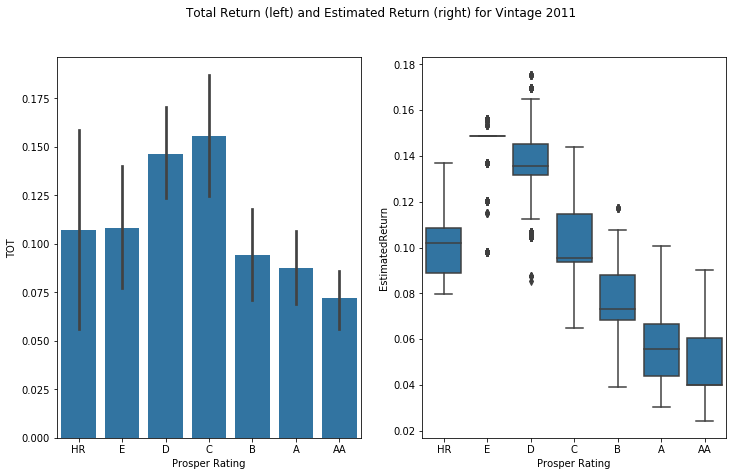

3263 number of closed loans
4222 number of total loans
77.0 % of loans are closed already.
37 months term to maturity(average)
27.7 million USD nominal amount.
6559 USD average loan size.


In [17]:
tot_by_rating_vintage(Vintage2011_filter, 'Vintage 2011', sb.color_palette()[0])
print(Vintage2011_filter.ClosedDate.count(), 'number of closed loans')
print(Vintage2011_filter.shape[0],'number of total loans')
print((round(Vintage2011_filter.ClosedDate.count() / Vintage2011_filter.shape[0],2)*100),'% of loans are closed already.')
print((round(Vintage2011_filter.Term.mean(),)),'months term to maturity(average)')
print(round(Vintage2011_filter.LoanOriginalAmount.sum()/1000000,1),'million USD nominal amount.')
print(round(Vintage2011_filter.LoanOriginalAmount.mean(),),'USD average loan size.')    

## The 2012 loan vintage

About half of the loans in the 2012 vintage have closed already. The credit impairment rate is at 13.2% so far, and another 4.5% of loans in this vintage are past due. This could significantly increase impairments soon. **In 2012, rating classes `B` and `C` have the highest Sharpe Ratios (so far).**

It is worth noting that both the average term and the average loan amount keep going up. The avg. term increased from 36 months in 2010 to 42 months ins 2012 and avg. loan volume from USD 4,400 in 2010 to approx. 7,500 USD in 2012,  indicating a **loose credit environment**. Loose credit is the practice of making credit easy to come by, and borrowers feel increasingly confident to get higher loan amounts and longer loan durations funded at Prosper Marketplace.


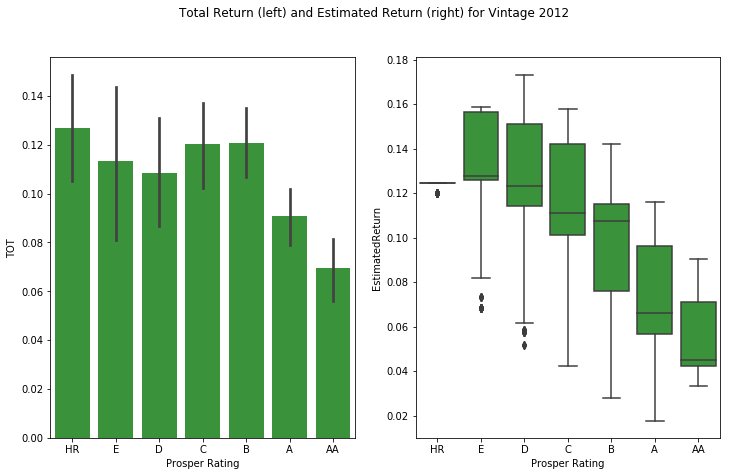

4524 number of closed loans
9496 number of total loans
48.0 % of loans are closed already.
42 months term to maturity(average)
71.1 million USD nominal amount.
7485 USD average loan size.


In [18]:
tot_by_rating_vintage(Vintage2012_filter, 'Vintage 2012', sb.color_palette()[2])
print(Vintage2012_filter.ClosedDate.count(), 'number of closed loans')
print(Vintage2012_filter.shape[0],'number of total loans')
print((round(Vintage2012_filter.ClosedDate.count() / Vintage2012_filter.shape[0],2)*100),'% of loans are closed already.')
print((round(Vintage2012_filter.Term.mean(),)),'months term to maturity(average)')
print(round(Vintage2012_filter.LoanOriginalAmount.sum()/1000000,1),'million USD nominal amount.')
print(round(Vintage2012_filter.LoanOriginalAmount.mean(),),'USD average loan size.')


## The 2013 loan vintage

Only 15% of the loans have closed already, making final investment results difficult to predict. Credit impairments in this vintage are still below 1%. However, we can highlight recent trends. 

Total return increases from approx. 5% for `AA` to a peak of almost 14% for `D`. The two lowest rating classes `E` and `HR` show lower average returns, presumably because most of the defaults and charged-offs have occurred here. Correspondingly, `E` and `HR` have much higher standard deviations than higher rating classes, making them less attractive in risk adjusted return terms.

**In 2013, the rating classes `C` and `D` have the highest Sharpe Ratios (so far). **  


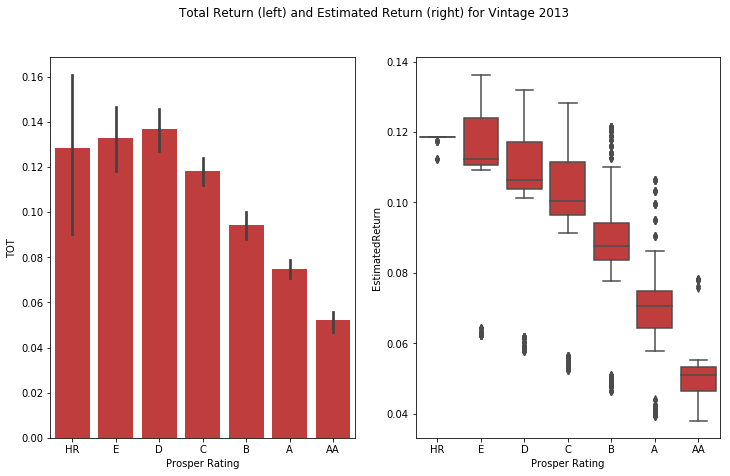

1655  number of closed loans
10715 number of total loans
15.0  % of loans are closed already.
46 months term to maturity(average)
106.7 million USD nominal amount.
9960 USD average loan size.


In [19]:
tot_by_rating_vintage(Vintage2013_filter, 'Vintage 2013', sb.color_palette()[3])
print(Vintage2013_filter.ClosedDate.count(), ' number of closed loans')
print(Vintage2013_filter.shape[0],'number of total loans')
print((round(Vintage2013_filter.ClosedDate.count() / Vintage2013_filter.shape[0],2)*100),' % of loans are closed already.')
print((round(Vintage2013_filter.Term.mean(),)),'months term to maturity(average)')
print(round(Vintage2013_filter.LoanOriginalAmount.sum()/1000000,1),'million USD nominal amount.')
print(round(Vintage2013_filter.LoanOriginalAmount.mean(),),'USD average loan size.')

## The 2014 loan vintage (Q1)

In the 2014 vintage few loans have paid interest yet and 99% of the loans are still outstanding. Therefore, despite its size with 11, 927 loans and USD 140 million nominal amount we should ignore this vintage for total return and risk adjusted return calculations. However, rating class `HR` and `D` and to a lesser extent `E` already show a high volatility, presumably because most of the credit events have happened here. 

The distribution of **Estimated Returns** encourages risk taking, showing increasing return expectation for lower credit quality.

**Borrower APR** keep coming down with `C` median rates now near 20% (23% in 2011) and `D` median rate now at 25% (30% in 2011). Furthermore, the average terms-to-maturity keeps increasing to 3.7 years with more 5-yr loans being originated. The average loan size in 2014 is approx. USD 12,000 (USD 4,400 in 2010).  



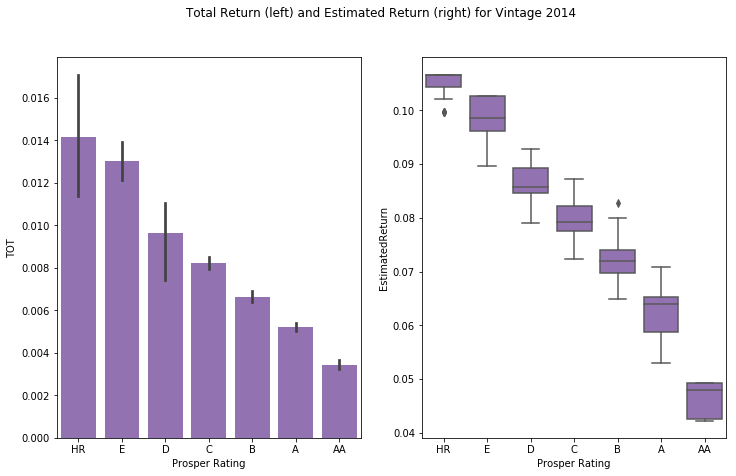

68  number of closed loans
11734 number of total loans
1.0  % of loans are closed already.
44 months term to maturity(average)
140.0 million USD nominal amount.
11927 USD average loan size.


In [20]:
tot_by_rating_vintage(Vintage2014_filter, 'Vintage 2014', sb.color_palette()[4])
print(Vintage2014_filter.ClosedDate.count(), ' number of closed loans')
print(Vintage2014_filter.shape[0],'number of total loans')
print((round(Vintage2014_filter.ClosedDate.count() / Vintage2013_filter.shape[0],2)*100),' % of loans are closed already.')
print((round(Vintage2014_filter.Term.mean(),)),'months term to maturity(average)')
print(round(Vintage2014_filter.LoanOriginalAmount.sum()/1000000,1),'million USD nominal amount.')
print(round(Vintage2014_filter.LoanOriginalAmount.mean(),),'USD average loan size.')

## The Break-down of Total Return Quarter-by-Quarter (post 2009)

**`N/A`= 0 , `HR`= 1 , `E`= 2 , `D`= 3 , `C`= 4 , `B`= 5 , `A`= 6 , `AA`= 7 **( ProsperRating )

The chart for Q1 2014 shows an increasing frequency of loan originations for higher credit quality. The number of new loans issued with a `HR`= 1 rating is lower than new loans with a `E`= 2 rating. The frequency of rating classes `B`= 5 , `A`= 6 and `AA`= 7 is the highest. Credit impairments only accured in rating class `D`= 3 so far, leading to a total return of -100% for those loans in delinquency. 

Most quarters show this pattern of higher frequencies of higher rated loans, albeit with some variation. We can gauge the development of credit quality and portfolio performance QUARTER-BY-QUARTER from this headmaps. The amorization create strong cash flows and they lead to lower loss-given-defaults (and chargedoffs) over time. Consequently, older vintages show an increasing number of chargedoff loans with moderate losses. Simultaniously, performing loans keep accummulating income and principal repayment.  

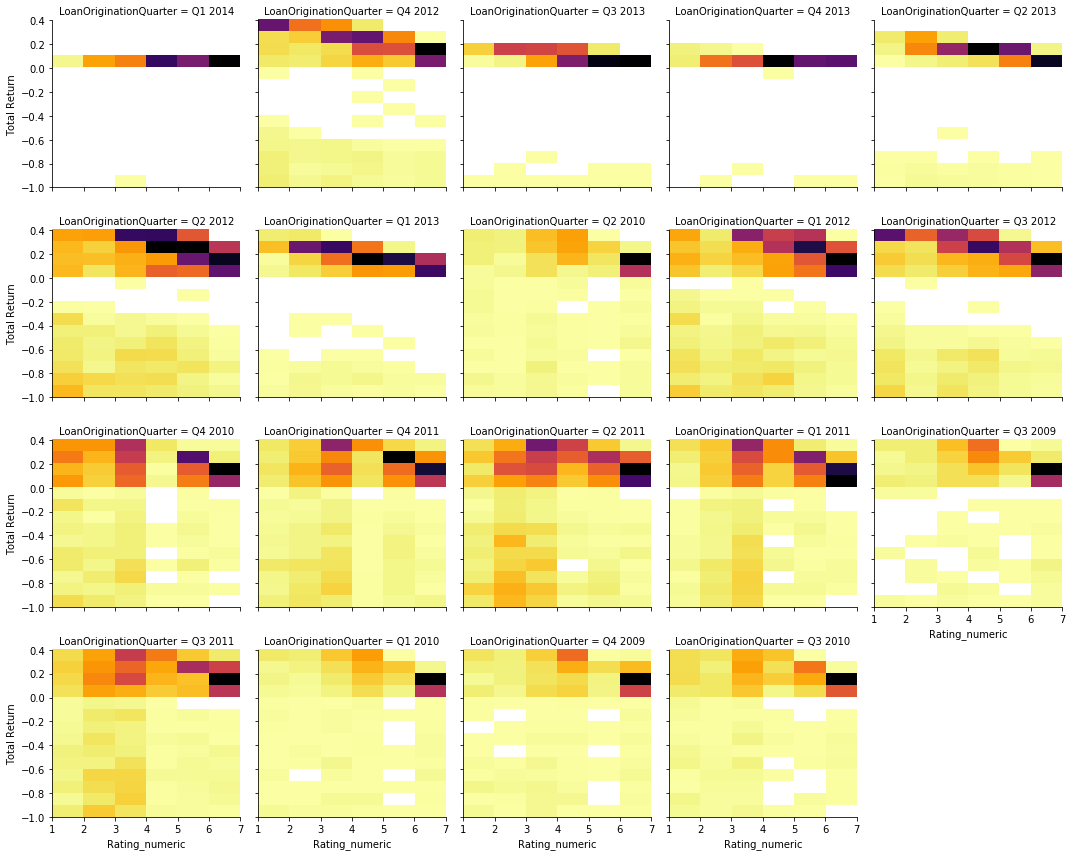

In [21]:
ProsperRating_filter = loan_master[loan_master.CreditGrade != loan_master.CreditGrade] # create a filter
CreditGrade_filter   = loan_master[loan_master.CreditGrade == loan_master.CreditGrade] # create a filter

def hist2dgridToT(x, y, **kwargs):
    """ Quick hack for creating heat maps with seaborn's PairGrid. """
    palette = kwargs.pop('color')
    bins_x = np.arange(1, 8, 1)
    bins_y = np.arange(-1.0,0.5, 0.1)
    plt.hist2d(x, y, bins = [bins_x, bins_y], cmap = palette, cmin = 0.5)
    
    
# create faceted heat maps on levels of the Loan Origination Quarter variable
g = sb.FacetGrid(data = ProsperRating_filter, col = 'LoanOriginationQuarter', col_wrap = 5, size = 3, xlim = [0,10])
g.map(hist2dgridToT, 'Rating_numeric', 'TOT', color = 'inferno_r')

g.set_xlabels('Rating_numeric')
g.set_ylabels('Total Return')

plt.show()    

In [22]:
print(Vintage2006_filter['TOT'].mean())
print(Vintage2007_filter['TOT'].mean())
print(Vintage2008_filter['TOT'].mean())

-0.04526877476848018
-0.10404043163367727
-0.030083778650777125


## The Break-down of Total Return Quarter-by-Quarter (before 2009)

**`nc`= 8 , `hr`= 9,`e`= 10,`d`= 11 ,`c`= 12 ,`b`= 13 ,`a`= 13 ,`aa`= 14 ** ( CreditGrade)

Prosper's performance track-record for loans issued until 2008 reflects its flowed business model at the time. The average **Total Return** for 2006, 2007 and 2008 are -4.5%, -10.4% and - 3.0%, respectively. 

We have learned that information about borrowers' **Employment Status** and **Income** was sketchy before the SEC registration. Furthermore, a minimum FICO 8 credit score of at least 640 for new borrowers was only introduced in 2009. The heatmaps provide valuable inside about the consequences of a severe macro-economic shock on unsecured loans from vulnerable borrowers. In particular, there is a very high frequency of defaults and charged-offs for low rated borrowers `e`= 10 and `nr`= 9.  

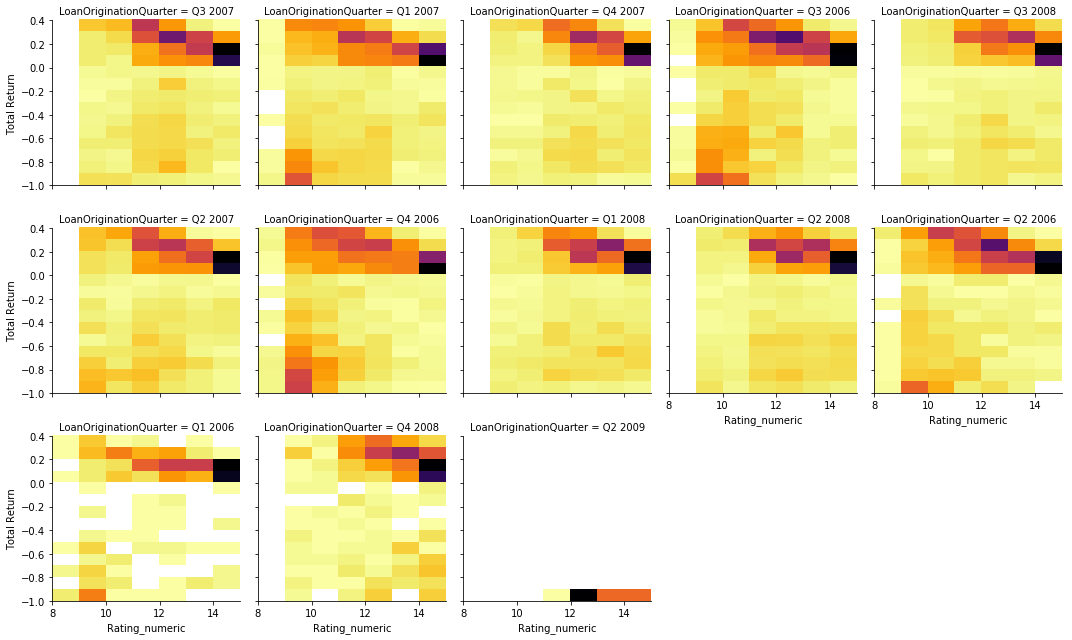

In [23]:
def hist2dgridToT2(x, y, **kwargs):
    """ Quick hack for creating heat maps with seaborn's PairGrid. """
    palette = kwargs.pop('color')
    bins_x = np.arange(8, 16, 1)
    bins_y = np.arange(-1.0,0.5, 0.1)
    plt.hist2d(x, y, bins = [bins_x, bins_y], cmap = palette, cmin = 0.5)
    
# create faceted heat maps on levels of the Loan Origination Quarter variable
g = sb.FacetGrid(data = CreditGrade_filter, col = 'LoanOriginationQuarter', col_wrap = 5, size = 3, xlim = [0,10])
g.map(hist2dgridToT2, 'Rating_numeric', 'TOT', color = 'inferno_r')
g.set_xlabels('Rating_numeric')
g.set_ylabels('Total Return')

plt.show()    

### Conclusion

We have defined the variables **Profit and Loss** (**P&L**) and **Total Return**(**TOT**) to evaluate the impact of defaults and charged-offs on investors' return. For performing loans, the P&L and TOT is predefined by the loan amount, the interest rate and the term to maturity. High interest rates on Prosper loans suggest attractive investment returns. However, the realized loss on non-performing loans (i.e. charged-off and defaulted loans) is -50% of principal and more. Therefore, reducing the likelihood of credit impairments is the best way to improve the portfolio return. **Investment performance is determined by the magnitude of the total returns by loan status and by the allocation of performing and non-performing loans in the portfolio.**  


We have looked at the rate of credit impairments (i.e. defaults and charged-offs) by rating and by calendar year. Credit impairment rates were highest for loans issued before 2009 (i.e. Vintage 2006, 2007 and 2008). While the default rates have kept low thereafter, the rate of charged-offs has picked-up again. Both defaults and charged-offs have a similar negative impact on investors total return, and investors should treat them the same. 

We have looked at the **ex-ante Expected Return** issued by Prosper and the **realized Total Return** by rating for the loan vintage years 2010-2013. The expected return by rating is a rough forecast of realized total return, typically overstating the ***annualized*** investment return by a high margin. 


### Conclusion (continued)

The ***annualized*** total return in Prosper's best performing closed vintage year, 2010, were approx. 2.3% for `AA`, 2.0% for `A` , 4.8% for `C` and `D`, 6.8% for `E` and 6.3% for `HR`. However, charged-offs have picked-up again and rates keep coming down. **A credit impairment rate of 15-20% per vintage year should be expected in normal times, and an economic downturn can lead to a sharp increase**. 

For most vintage years, the medium credit quality ratings `B`, `C` and `D` have the most attractive risk-adjusted profile. Loans from borrowers of lower quality `E` and high risk `HR` have generated similar or even lower total returns in 2011-2013 vintages so far, but with a much higher volatility, making 'stock picking' very dangerous. Given the idiosyncratic risk, a high diversification with 100+ loans in a portfolio is advisable for investments in Prosper loans (e.g. USD 50-100 each). Investors should allocate to high rating classes `AA`and `A` as well to improve the quality mix of the portfolio. By applying these guidelines an investment return of **approx. 5% p.a.** can be expected for a well-diversified portfolio. However, economic downturns could significantly reduce the performance. We have looked at the relationship between the variables **Employment Status** and **Income Range** and credit impairment rates. The categories can serve as indicators for credit risk. A very low or very high income is a good predictor of increased credit impairment risk. An Employment Status of `Employed` signals the lowest risk of delinquencies while a status of `Self-employed` is significantly riskier.



> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert <file_name>.ipynb --to slides --post serve --template output_toggle`

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!